In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
# load the iris dataset
df = sns.load_dataset("iris")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.shape # rows and columns

(150, 5)

In [9]:
# basic data exploration
print("\nbasic information about dataset:")
print(df.info()) # overview of dataset


basic information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

<Figure size 1200x800 with 0 Axes>

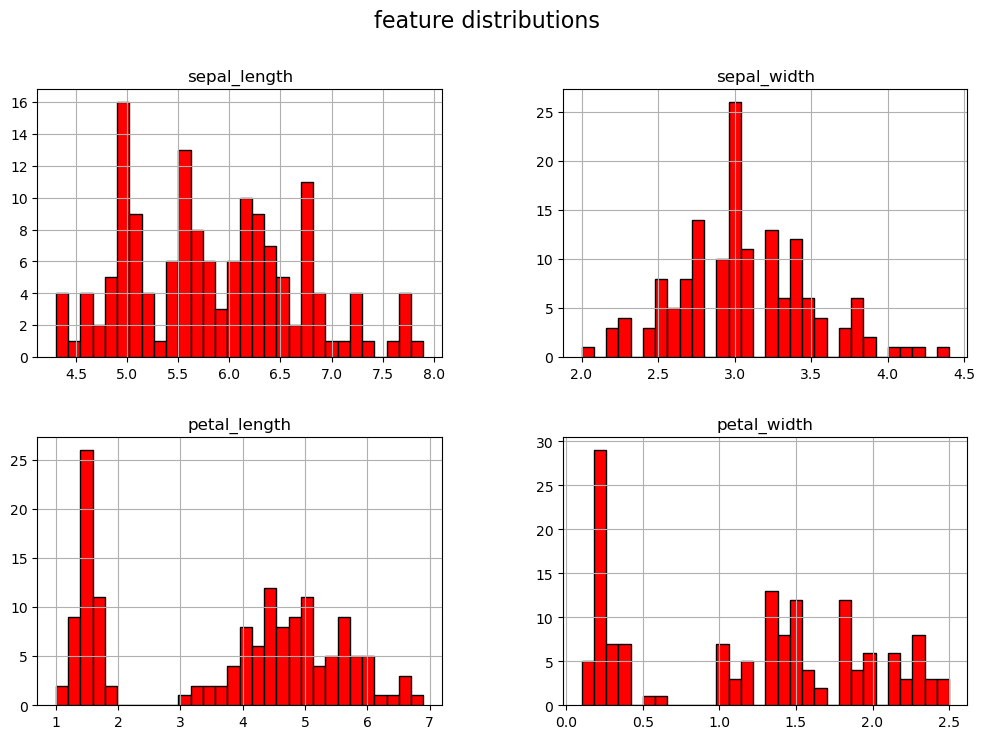

In [20]:
# Histogramfor distribution of features
plt.figure(figsize=(12,8))
df.hist(figsize=(12,8), bins=30,color='r' ,edgecolor='black')
plt.suptitle("feature distributions", fontsize=16)
plt.show()

### <b> Inferences from Histograms:</b></u>
1. **Sepal Length**:
   - The distribution of sepal length appears to be roughly normal with a slight skew towards the right.
   - Most of the sepal length fall between 4.5 and 7.5 cm.

2. **Sepal Width**:
   - The distribution of sepal width appears to be roughly normal with a slight skew towards the left.
   - Most of the sepal width fall between 2.5 and 3.5 cm.

3. **Petal length**:
  - The distribution of petal length is more spread out and shows a clear separation between different species.
  - There are distinct peaks indicating the presence of different species with varying petal lengths.

4. **Petal Width**:
   - Similar to petal length, the distribution of petal width shows clear separation between species.
   - There are distinct peaks indicating the presence of different species with varying petal widths.


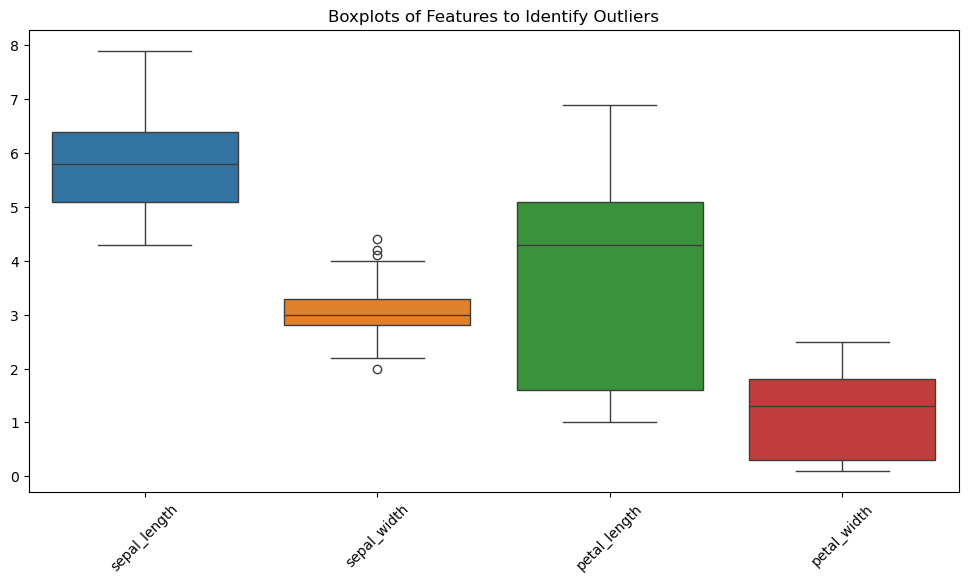

In [21]:
# Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features to Identify Outliers")
plt.show()

<b> Inferences from Boxplots: </b></u>

1. **Sepal Length**:
  - There are a few outliers in the sepal length distribution.
  - The median sepal length is around 5.8 cm, with the intrquatile range (IQR) between 5.1 and 6.4 cm.

2. **Sepal Width**:
  - There are several outliers in the sepal width distribution.
  - The median sepal width is around 3.0 cm, with the IQR between 2.8 and 3.3 cm.

3. **Petal Length**:
  - The petal length distribution shows clear separation between species with minimal overlap.
  - The median petal length varies significantly between species, indicating it is a good feature for classification.

4. **Petal Width**:
  - Similar to petal length the petal width distribution shows clear separation between species.
  - The median petal width varies significantly separation between species, indicatingit 
    it is also a good feature for classification.

num_col = df.select_dtypes(include=[np.number]).columns
cat_col = df.select_dtypes(include=['object']).columns
print(f"numerical_data {num_col}")
print(f"categorical_data {cat_col}")

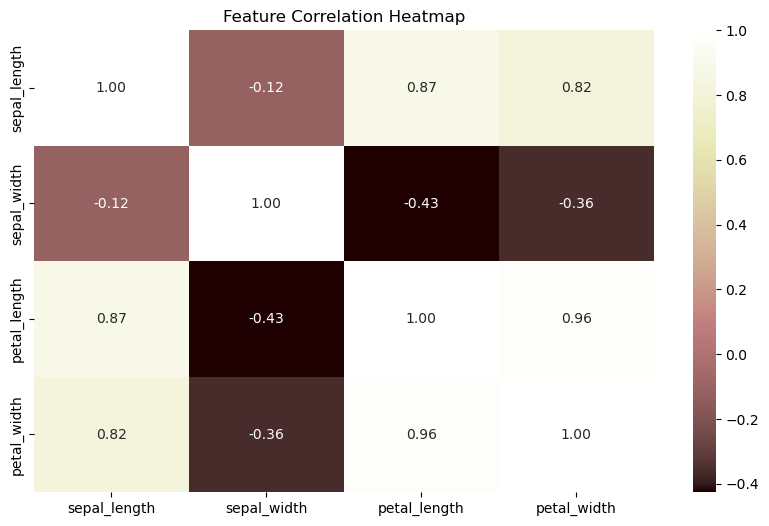

In [24]:
# Correlation Matrix
num = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
corr_matrix = df[num].corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='pink', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

Based on the heatmap of the correlation matrix, we can

1.**Sepal Length**:
  - Positively correlated with petal length (0.87) and petal width (0.82).
  - Weak negative correlation with sepal width (-0.12).

2.**Sepal Width**:
  - Weak negative correlation with sepal length (-0.12), petal length (-0.43),and petal width (-0.37).

3.**Petal Length**:
  - Storng positive correlation with sepal length (0.87) and petal width (0.96).
  - Weak negative correlation with sepal width (-0.43).

4.**Petal Width**:
  - Storng positive correlation with petal length (0.96) and sepal length (0.82).
  - Weak negative correlation with sepal width (-0.37).

5.**Species**:
  - Strong positive correlation with petal length (0.95) and petal width (0.96).
  - Moderate positive correlation with sepal length (0.78).
  - Moderate nagetive correlation with sepal length (-0.43).



In [25]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [27]:
#Encode target labels
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])

In [28]:
df.species.value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [29]:
# Define features and target
x = df.drop(columns=["species"]) # All features except spe
y = df["species"] # Target feature

In [31]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
# Function to evalute k-NN for
def evaluate_knn(k_values, weights= 'uniform'):
    results = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[k] = {'accuracy': accuracy, 'f1_score':f1}
    return results

In [40]:
# Test for k = 3, 5, 7
k_values = [3, 5, 7]
k_values = knn_results = evaluate_knn(k_values, weights='uniform')
weighted_knn_results = evaluate_knn(k_values, weights='distance')

In [43]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame.from_dict({
    'regular k-NN': regular_knn_results,
    'weighted k-NN': weighted_knn_results
}, orient='index').T
results_df

NameError: name 'regular_knn_results' is not defined